In [1]:
import os
import shutil
import glob
import random
import cv2
from tensorflow.keras.applications import VGG16
import numpy as np
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(100,100,3))
conv_base.trainable=False

model = models.Sequential()
for l in conv_base.layers:
    model.add(l)
model.add(layers.Flatten())
model.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['categorical_accuracy'])
model.summary()

filepath="VGG16_Indus_Fruits_7_classes_100_100_7th Experiment.h5"
checkpoint = ModelCheckpoint(filepath, save_best_only=True)
callbacks_list = [checkpoint]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 25, 25, 256)       2

In [3]:
resized_images_100_100_train_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Train'
resized_images_100_100_test_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test'
resized_images_100_100_validation_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Validation'

In [4]:
batch_size=16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation  and test data should not be augmented!
validation_datagen=ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        resized_images_100_100_train_dir,
        target_size=(100, 100),
        batch_size=batch_size)

validation_generator = validation_datagen.flow_from_directory(
        resized_images_100_100_validation_dir,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

test_generator = test_datagen.flow_from_directory(
        resized_images_100_100_test_dir,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

Found 2800 images belonging to 7 classes.
Found 280 images belonging to 7 classes.
Found 560 images belonging to 7 classes.


In [5]:
import glob
from pathlib import Path
from tensorflow.keras.utils import to_categorical
import cv2

apple_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\apple')
banana_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\banana')
orange_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\orange')
watermelon_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\watermelon')
mango_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\mango')
grape_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\grape')
strawberry_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\strawberry')

apple_cases = apple_cases_dir.glob('*.jpg')
banana_cases = banana_cases_dir.glob('*.jpg')
orange_cases = orange_cases_dir.glob('*.jpg')
watermelon_cases = watermelon_cases_dir.glob('*.jpg')
mango_cases = mango_cases_dir.glob('*.jpg')
grape_cases = grape_cases_dir.glob('*.jpg')
strawberry_cases = strawberry_cases_dir.glob('*.jpg')

test_data = []
test_labels = []

for img in apple_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [0]
    test_data.append(img)
    test_labels.append(label)

for img in banana_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [1]
    test_data.append(img)
    test_labels.append(label)

for img in grape_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [2]
    test_data.append(img)
    test_labels.append(label)
    
for img in mango_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [3]
    test_data.append(img)
    test_labels.append(label)

for img in orange_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [4]
    test_data.append(img)
    test_labels.append(label)

for img in strawberry_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [5]
    test_data.append(img)
    test_labels.append(label)

for img in watermelon_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [6]
    test_data.append(img)
    test_labels.append(label)

test_data = np.array(test_data)
test_labels = np.array(test_labels)
test_labels_one_hot_encoding=to_categorical(test_labels)

print("Total number of test examples: ", test_data.shape)
print("Total number of test labels:", test_labels.shape)

Total number of test examples:  (560, 100, 100, 3)
Total number of test labels: (560, 1)


In [6]:
number_of_training_samples=2800
number_of_validation_samples=280
number_of_test_samples=560

In [7]:
import math

history = model.fit_generator(
      train_generator,
      steps_per_epoch=math.ceil(number_of_training_samples//batch_size),
      epochs=200,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=math.ceil(number_of_validation_samples//batch_size))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/200
175/175 [==============================] - 10s 58ms/step - loss: 1.8183 - categorical_accuracy: 0.3157 - val_loss: 1.5235 - val_categorical_accuracy: 0.4596
Epoch 2/200
175/175 [==============================] - 10s 60ms/step - loss: 1.4937 - categorical_accuracy: 0.4725 - val_loss: 1.3046 - val_categorical_accuracy: 0.5625
Epoch 3/200
175/175 [==============================] - 10s 58ms/step - loss: 1.3280 - categorical_accuracy: 0.5432 - val_loss: 1.1676 - val_categorical_accuracy: 0.6471
Epoch 4/200
175/175 [==============================] - 11s 60ms/step - loss: 1.2386 - categorical_accuracy: 0.5889 - val_loss: 1.0867 - val_categorical_accuracy: 0.6581
Epoch 5/200
175/175 [==============================] - 10s 60ms/step - loss: 1.1628 - categorical_accuracy: 0.6139 - val_loss: 1.0256 - val_categorical_accuracy: 0.6728
Epoch 6/200
175/175 [==============================] - 10s 59ms/step - loss: 1.

175/175 [==============================] - 11s 62ms/step - loss: 0.5677 - categorical_accuracy: 0.8218 - val_loss: 0.5991 - val_categorical_accuracy: 0.8051
Epoch 96/200
175/175 [==============================] - 10s 58ms/step - loss: 0.5605 - categorical_accuracy: 0.8261 - val_loss: 0.6124 - val_categorical_accuracy: 0.7941
Epoch 97/200
175/175 [==============================] - 10s 56ms/step - loss: 0.5550 - categorical_accuracy: 0.8236 - val_loss: 0.6290 - val_categorical_accuracy: 0.7941
Epoch 98/200
175/175 [==============================] - 10s 57ms/step - loss: 0.5559 - categorical_accuracy: 0.8307 - val_loss: 0.6012 - val_categorical_accuracy: 0.7941
Epoch 99/200
175/175 [==============================] - 11s 61ms/step - loss: 0.5639 - categorical_accuracy: 0.8200 - val_loss: 0.6200 - val_categorical_accuracy: 0.7868
Epoch 100/200
175/175 [==============================] - 11s 62ms/step - loss: 0.5390 - categorical_accuracy: 0.8361 - val_loss: 0.6315 - val_categorical_accuracy:

175/175 [==============================] - 10s 57ms/step - loss: 0.4995 - categorical_accuracy: 0.8475 - val_loss: 0.6170 - val_categorical_accuracy: 0.7904
Epoch 144/200
175/175 [==============================] - 10s 59ms/step - loss: 0.4953 - categorical_accuracy: 0.8532 - val_loss: 0.6151 - val_categorical_accuracy: 0.8125
Epoch 145/200
175/175 [==============================] - 10s 56ms/step - loss: 0.4921 - categorical_accuracy: 0.8500 - val_loss: 0.5976 - val_categorical_accuracy: 0.8051
Epoch 146/200
175/175 [==============================] - 10s 56ms/step - loss: 0.5142 - categorical_accuracy: 0.8411 - val_loss: 0.5901 - val_categorical_accuracy: 0.8088
Epoch 147/200
175/175 [==============================] - 10s 56ms/step - loss: 0.5219 - categorical_accuracy: 0.8361 - val_loss: 0.6106 - val_categorical_accuracy: 0.8015
Epoch 148/200
175/175 [==============================] - 10s 56ms/step - loss: 0.4950 - categorical_accuracy: 0.8471 - val_loss: 0.6006 - val_categorical_accur

Epoch 191/200
175/175 [==============================] - 10s 57ms/step - loss: 0.4854 - categorical_accuracy: 0.8511 - val_loss: 0.6296 - val_categorical_accuracy: 0.8162
Epoch 192/200
175/175 [==============================] - 10s 56ms/step - loss: 0.4896 - categorical_accuracy: 0.8450 - val_loss: 0.6070 - val_categorical_accuracy: 0.7941
Epoch 193/200
175/175 [==============================] - 10s 56ms/step - loss: 0.4586 - categorical_accuracy: 0.8596 - val_loss: 0.6084 - val_categorical_accuracy: 0.8051
Epoch 194/200
175/175 [==============================] - 10s 56ms/step - loss: 0.4876 - categorical_accuracy: 0.8436 - val_loss: 0.6084 - val_categorical_accuracy: 0.8051
Epoch 195/200
175/175 [==============================] - 10s 56ms/step - loss: 0.4610 - categorical_accuracy: 0.8596 - val_loss: 0.6239 - val_categorical_accuracy: 0.8088
Epoch 196/200
175/175 [==============================] - 10s 56ms/step - loss: 0.4701 - categorical_accuracy: 0.8593 - val_loss: 0.6056 - val_cat

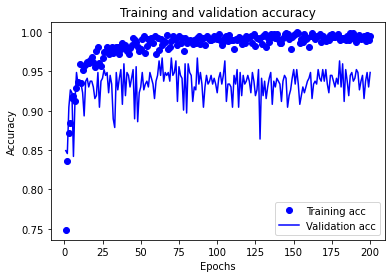

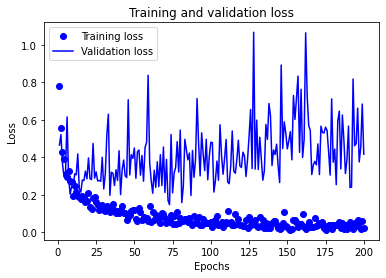

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [7]:
from tensorflow.keras.models import load_model

best_model = load_model('VGG16_Indus_Fruits_7_classes_100_100_7th Experiment.h5')

In [8]:
# Evaluation on test dataset

test_loss, test_score = best_model.evaluate(test_data, test_labels_one_hot_encoding, batch_size=8)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

70/70 [==============================] - 2s 30ms/step - loss: 0.5482 - categorical_accuracy: 0.8161
Loss on test set:  0.5481944680213928
Accuracy on test set:  0.8160714507102966


In [9]:
best_model.trainable = True

set_trainable = False
for layer in best_model.layers:
    if layer.name == 'block4_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [10]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 25, 25, 256)       2

In [11]:
best_model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=5e-5),metrics=['categorical_accuracy'])

filepath="VGG16_Indus_Fruits_7_classes_100_100_7th Experiment_fine_tuned.h5"
checkpoint = ModelCheckpoint(filepath, save_best_only=True)
callbacks_list = [checkpoint]

In [13]:
import math

history=best_model.fit_generator(
      train_generator,
      steps_per_epoch=math.ceil(number_of_training_samples//batch_size),
      epochs=200,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=math.ceil(number_of_validation_samples//batch_size))

Epoch 1/200
175/175 [==============================] - 16s 92ms/step - loss: 0.7831 - categorical_accuracy: 0.7486 - val_loss: 0.4651 - val_categorical_accuracy: 0.8493
Epoch 2/200
175/175 [==============================] - 16s 89ms/step - loss: 0.5570 - categorical_accuracy: 0.8361 - val_loss: 0.5214 - val_categorical_accuracy: 0.8456
Epoch 3/200
175/175 [==============================] - 16s 93ms/step - loss: 0.4276 - categorical_accuracy: 0.8711 - val_loss: 0.3668 - val_categorical_accuracy: 0.9044
Epoch 4/200
175/175 [==============================] - 16s 93ms/step - loss: 0.3883 - categorical_accuracy: 0.8850 - val_loss: 0.2950 - val_categorical_accuracy: 0.9265
Epoch 5/200
175/175 [==============================] - 16s 89ms/step - loss: 0.3111 - categorical_accuracy: 0.9157 - val_loss: 0.3201 - val_categorical_accuracy: 0.9228
Epoch 6/200
175/175 [==============================] - 16s 89ms/step - loss: 0.2942 - categorical_accuracy: 0.9189 - val_loss: 0.6159 - val_categorical_acc

175/175 [==============================] - 15s 88ms/step - loss: 0.0477 - categorical_accuracy: 0.9914 - val_loss: 0.4963 - val_categorical_accuracy: 0.9338
Epoch 98/200
175/175 [==============================] - 15s 89ms/step - loss: 0.0511 - categorical_accuracy: 0.9954 - val_loss: 0.2799 - val_categorical_accuracy: 0.9412
Epoch 99/200
175/175 [==============================] - 15s 89ms/step - loss: 0.0474 - categorical_accuracy: 0.9932 - val_loss: 0.4071 - val_categorical_accuracy: 0.9338
Epoch 100/200
175/175 [==============================] - 15s 88ms/step - loss: 0.0525 - categorical_accuracy: 0.9907 - val_loss: 0.4804 - val_categorical_accuracy: 0.9228
Epoch 101/200
175/175 [==============================] - 15s 88ms/step - loss: 0.0267 - categorical_accuracy: 0.9979 - val_loss: 0.4786 - val_categorical_accuracy: 0.9412
Epoch 102/200
175/175 [==============================] - 15s 89ms/step - loss: 0.0470 - categorical_accuracy: 0.9900 - val_loss: 0.2143 - val_categorical_accurac

175/175 [==============================] - 15s 89ms/step - loss: 0.0180 - categorical_accuracy: 0.9982 - val_loss: 0.2652 - val_categorical_accuracy: 0.9412
Epoch 146/200
175/175 [==============================] - 15s 88ms/step - loss: 0.0209 - categorical_accuracy: 0.9968 - val_loss: 0.8931 - val_categorical_accuracy: 0.9044
Epoch 147/200
175/175 [==============================] - 15s 88ms/step - loss: 0.0515 - categorical_accuracy: 0.9907 - val_loss: 0.4468 - val_categorical_accuracy: 0.9191
Epoch 148/200
175/175 [==============================] - 15s 89ms/step - loss: 0.1056 - categorical_accuracy: 0.9779 - val_loss: 0.5892 - val_categorical_accuracy: 0.9265
Epoch 149/200
175/175 [==============================] - 15s 88ms/step - loss: 0.0340 - categorical_accuracy: 0.9939 - val_loss: 0.5288 - val_categorical_accuracy: 0.9412
Epoch 150/200
175/175 [==============================] - 15s 89ms/step - loss: 0.0259 - categorical_accuracy: 0.9957 - val_loss: 0.4450 - val_categorical_accur

Epoch 193/200
175/175 [==============================] - 16s 89ms/step - loss: 0.0174 - categorical_accuracy: 0.9961 - val_loss: 0.8183 - val_categorical_accuracy: 0.9265
Epoch 194/200
175/175 [==============================] - 15s 88ms/step - loss: 0.0468 - categorical_accuracy: 0.9911 - val_loss: 0.4619 - val_categorical_accuracy: 0.9375
Epoch 195/200
175/175 [==============================] - 15s 89ms/step - loss: 0.0327 - categorical_accuracy: 0.9936 - val_loss: 0.4730 - val_categorical_accuracy: 0.9449
Epoch 196/200
175/175 [==============================] - 15s 88ms/step - loss: 0.0648 - categorical_accuracy: 0.9950 - val_loss: 0.6626 - val_categorical_accuracy: 0.9154
Epoch 197/200
175/175 [==============================] - 15s 89ms/step - loss: 0.0515 - categorical_accuracy: 0.9882 - val_loss: 0.3754 - val_categorical_accuracy: 0.9375
Epoch 198/200
175/175 [==============================] - 15s 89ms/step - loss: 0.0191 - categorical_accuracy: 0.9964 - val_loss: 0.4515 - val_cat

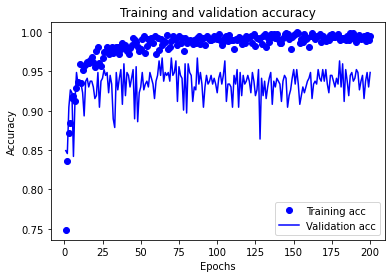

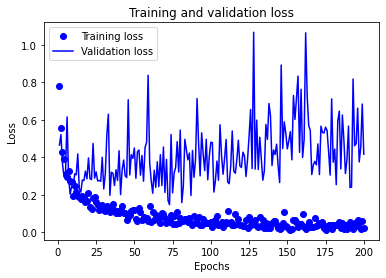

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
best_model_fine_tuned = load_model('VGG16_Indus_Fruits_7_classes_100_100_7th Experiment_fine_tuned.h5')

In [13]:
test_loss, test_score = best_model_fine_tuned.evaluate(test_data, test_labels_one_hot_encoding, batch_size=8)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

70/70 [==============================] - 2s 32ms/step - loss: 0.2807 - categorical_accuracy: 0.9482
Loss on test set:  0.28067994117736816
Accuracy on test set:  0.9482142925262451


In [14]:
# Get predictions
preds = best_model_fine_tuned.predict(test_data, batch_size=16,verbose=1)
preds=np.around(preds)
orig_test_labels=test_labels
predicted_labels=np.argmax(preds,axis=1)
predicted_labels=np.reshape(predicted_labels,(560,1))
print(predicted_labels.shape)
print(orig_test_labels.shape)

35/35 [==============================] - 1s 42ms/step
(560, 1)
(560, 1)


<Figure size 432x288 with 0 Axes>

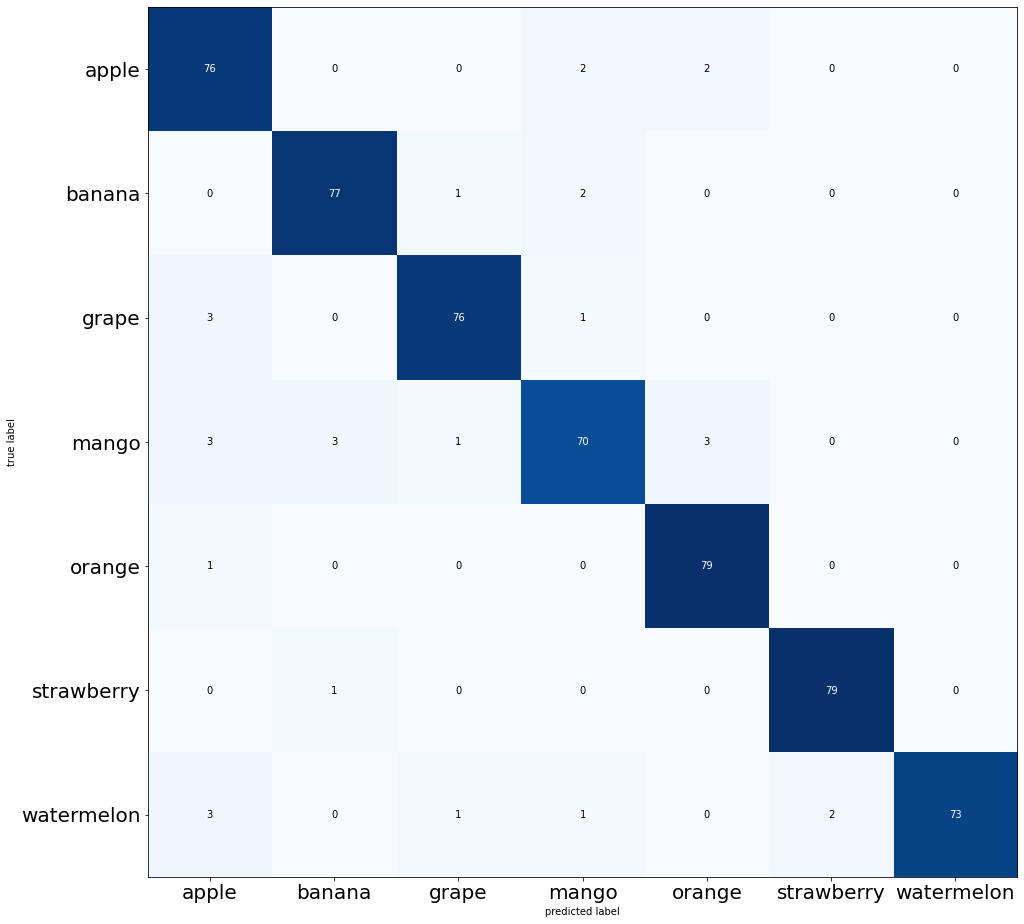

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
# Get the confusion matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm  = confusion_matrix(orig_test_labels, predicted_labels)
plt.figure()
plot_confusion_matrix(cm,figsize=(16,16), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(7), ['apple', 'banana','grape','mango','orange','strawberry','watermelon'], fontsize=20)
plt.yticks(range(7), ['apple', 'banana','grape','mango','orange','strawberry','watermelon'], fontsize=20)
plt.show()

In [16]:
apple_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Train\\apple')
banana_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Train\\banana')
orange_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Train\\orange')
watermelon_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Train\\watermelon')
mango_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Train\\mango')
grape_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Train\\grape')
strawberry_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Train\\strawberry')

apple_cases = apple_cases_dir.glob('*.jpg')
banana_cases = banana_cases_dir.glob('*.jpg')
orange_cases = orange_cases_dir.glob('*.jpg')
watermelon_cases = watermelon_cases_dir.glob('*.jpg')
mango_cases = mango_cases_dir.glob('*.jpg')
grape_cases = grape_cases_dir.glob('*.jpg')
strawberry_cases = strawberry_cases_dir.glob('*.jpg')

train_data = []
train_labels = []

for img in apple_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [0]
    train_data.append(img)
    train_labels.append(label)

for img in banana_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [1]
    train_data.append(img)
    train_labels.append(label)

for img in grape_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [2]
    train_data.append(img)
    train_labels.append(label)
    
for img in mango_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [3]
    train_data.append(img)
    train_labels.append(label)

for img in orange_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [4]
    train_data.append(img)
    train_labels.append(label)

for img in strawberry_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [5]
    train_data.append(img)
    train_labels.append(label)

for img in watermelon_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [6]
    train_data.append(img)
    train_labels.append(label)

train_data = np.array(train_data)
train_labels = np.array(train_labels)
train_labels_one_hot_encoding=to_categorical(train_labels)

print("Total number of train examples: ", train_data.shape)
print("Total number of train labels:", train_labels.shape)

Total number of train examples:  (2800, 100, 100, 3)
Total number of train labels: (2800, 1)


In [17]:
apple_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Validation\\apple')
banana_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Validation\\banana')
orange_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Validation\\orange')
watermelon_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Validation\\watermelon')
mango_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Validation\\mango')
grape_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Validation\\grape')
strawberry_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Validation\\strawberry')

apple_cases = apple_cases_dir.glob('*.jpg')
banana_cases = banana_cases_dir.glob('*.jpg')
orange_cases = orange_cases_dir.glob('*.jpg')
watermelon_cases = watermelon_cases_dir.glob('*.jpg')
mango_cases = mango_cases_dir.glob('*.jpg')
grape_cases = grape_cases_dir.glob('*.jpg')
strawberry_cases = strawberry_cases_dir.glob('*.jpg')

validation_data = []
validation_labels = []

for img in apple_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [0]
    validation_data.append(img)
    validation_labels.append(label)

for img in banana_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [1]
    validation_data.append(img)
    validation_labels.append(label)

for img in grape_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [2]
    validation_data.append(img)
    validation_labels.append(label)
    
for img in mango_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [3]
    validation_data.append(img)
    validation_labels.append(label)

for img in orange_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [4]
    validation_data.append(img)
    validation_labels.append(label)

for img in strawberry_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [5]
    validation_data.append(img)
    validation_labels.append(label)

for img in watermelon_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [6]
    validation_data.append(img)
    validation_labels.append(label)

validation_data = np.array(validation_data)
validation_labels = np.array(validation_labels)
validation_labels_one_hot_encoding=to_categorical(validation_labels)

print("Total number of validation examples: ", validation_data.shape)
print("Total number of validation labels:", validation_labels.shape)

Total number of validation examples:  (280, 100, 100, 3)
Total number of validation labels: (280, 1)


In [18]:
import random
import tensorflow as tf
import matplotlib.pyplot as plt

In [19]:
def adversarial_pattern(image, label):
    image = tf.cast(image, tf.float32)
    
    with tf.GradientTape() as tape:
        tape.watch(image)
        prediction = best_model_fine_tuned(image)
        loss = tf.keras.losses.MSE(label, prediction)
    
    gradient = tape.gradient(loss, image)
    
    signed_grad = tf.sign(gradient)
    
    return signed_grad

In [20]:
from PIL import Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


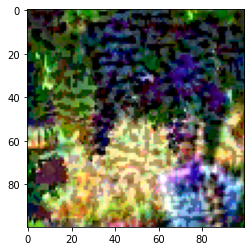

In [21]:
img_rows=100
img_cols=100
channels=3
image = train_data[1000]
image_label=train_labels[1000]
perturbations = adversarial_pattern(image.reshape((1, img_rows, img_cols, channels)), image_label).numpy()
adversarial = image + perturbations * 0.15
plt.imshow(adversarial.reshape(img_rows,img_cols,channels))
plt.show()

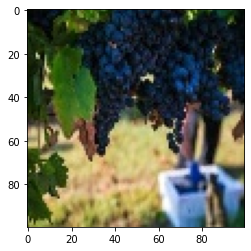

In [22]:
plt.imshow(train_data[1000])

In [23]:
print(best_model_fine_tuned.predict(image.reshape((1, img_rows, img_cols, channels))).argmax())
print(best_model_fine_tuned.predict(adversarial).argmax())

2
2


In [24]:
img_rows=100
img_cols=100
channels=3
adversarial_test_data=[]
adversarial_test_labels=[]
for i in range(test_data.shape[0]):
    image = test_data[i]
    image_label=test_labels[i]
    perturbations = adversarial_pattern(image.reshape((1, img_rows, img_cols, channels)), image_label).numpy()
    adversarial=image + perturbations * 0.15
    adversarial_test_data.append(adversarial)  
    adversarial_test_labels.append(image_label)  
adversarial_test_data=np.array(adversarial_test_data).reshape(-1,100,100,3)
adversarial_test_labels=np.array(adversarial_test_labels).reshape(-1,1)
print(adversarial_test_data.shape)
print(adversarial_test_labels.shape)

(560, 100, 100, 3)
(560, 1)


In [25]:
best_model_fine_tuned.evaluate(x=adversarial_test_data, y=to_categorical(adversarial_test_labels,7), verbose=1)

18/18 [==============================] - 1s 69ms/step - loss: 5.5923 - categorical_accuracy: 0.6250


[5.592277526855469, 0.625]

In [26]:
NUMBER_OF_TRAIN_IMAGES_PER_FRUIT_CLASS=400
fruit_classes=['apple','banana','grape','mango','orange','strawberry','watermelon']
DATA_DIR='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100_with Adversarial Images_0_15_VGG16\\Train'
j=0
k=0
for i in range(len(train_data)):
    if (i%400)!=0 or i==0:
        path = os.path.join(DATA_DIR,fruit_classes[j])
        original_image=train_data[i]
        label_of_original_image=train_labels[i]
        perturbations = adversarial_pattern(original_image.reshape((1, img_rows, img_cols, channels)), label_of_original_image).numpy()
        adversarial = original_image + perturbations * 0.15
        plt.imsave(os.path.join(path,"adv_"+fruit_classes[j]+"_"+str(k+1+NUMBER_OF_TRAIN_IMAGES_PER_FRUIT_CLASS)+".jpg"),np.clip(adversarial.reshape(img_rows,img_cols,channels),0.0,1.0))
        k+=1
    elif (i%400)==0 and i!=0:
        k=0
        j+=1
        path = os.path.join(DATA_DIR,fruit_classes[j])
        original_image=train_data[i]
        label_of_original_image=train_labels[i]
        perturbations = adversarial_pattern(original_image.reshape((1, img_rows, img_cols, channels)), label_of_original_image).numpy()
        adversarial = original_image + perturbations * 0.15
        plt.imsave(os.path.join(path,"adv_"+fruit_classes[j]+"_"+str(k+1+NUMBER_OF_TRAIN_IMAGES_PER_FRUIT_CLASS)+".jpg"),np.clip(adversarial.reshape(img_rows,img_cols,channels),0.0,1.0))  
        k+=1

In [27]:
NUMBER_OF_VALIDATION_IMAGES_PER_FRUIT_CLASS=40
fruit_classes=['apple','banana','grape','mango','orange','strawberry','watermelon']
DATA_DIR='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100_with Adversarial Images_0_15_VGG16\\Validation'
j=0
k=0
for i in range(len(validation_data)):
    if (i%NUMBER_OF_VALIDATION_IMAGES_PER_FRUIT_CLASS)!=0 or i==0:
        path = os.path.join(DATA_DIR,fruit_classes[j])
        original_image=validation_data[i]
        label_of_original_image=validation_labels[i]
        perturbations = adversarial_pattern(original_image.reshape((1, img_rows, img_cols, channels)), label_of_original_image).numpy()
        adversarial = original_image + perturbations * 0.15
        plt.imsave(os.path.join(path,"adv_"+fruit_classes[j]+"_"+str(k+1+NUMBER_OF_VALIDATION_IMAGES_PER_FRUIT_CLASS)+".jpg"),np.clip(adversarial.reshape(img_rows,img_cols,channels),0.0,1.0))
        k+=1
    elif (i%NUMBER_OF_VALIDATION_IMAGES_PER_FRUIT_CLASS)==0 and i!=0:
        k=0
        j+=1
        path = os.path.join(DATA_DIR,fruit_classes[j])
        original_image=validation_data[i]
        label_of_original_image=validation_labels[i]
        perturbations = adversarial_pattern(original_image.reshape((1, img_rows, img_cols, channels)), label_of_original_image).numpy()
        adversarial = original_image + perturbations * 0.15
        plt.imsave(os.path.join(path,"adv_"+fruit_classes[j]+"_"+str(k+1+NUMBER_OF_VALIDATION_IMAGES_PER_FRUIT_CLASS)+".jpg"),np.clip(adversarial.reshape(img_rows,img_cols,channels),0.0,1.0))  
        k+=1

In [28]:
vgg16_train_set_with_adversarial_images='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100_with Adversarial Images_0_15_VGG16\\Train'
vgg16_validation_set_with_adversarial_images='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100_with Adversarial Images_0_15_VGG16\\Validation'

In [29]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
validation_datagen=ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        vgg16_train_set_with_adversarial_images,
        target_size=(100, 100),
        batch_size=batch_size)

validation_generator = validation_datagen.flow_from_directory(
        vgg16_validation_set_with_adversarial_images,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

Found 5600 images belonging to 7 classes.
Found 560 images belonging to 7 classes.


In [30]:
best_model_fine_tuned.trainable = True

set_trainable = False
for layer in best_model_fine_tuned.layers:
    if layer.name == 'block3_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [31]:
best_model_fine_tuned.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 25, 25, 256)       2

In [32]:
filepath="VGG16_Indus_Fruits_7_classes_100_100_10th Experiment_fine_tuned with Adversarial Images_0_15.h5"
checkpoint = ModelCheckpoint(filepath, save_best_only=True)
callbacks_list = [checkpoint]
best_model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-5),metrics=['categorical_accuracy'])

In [33]:
number_of_training_samples=5600
number_of_validation_samples=560

In [34]:
import math

history = best_model_fine_tuned.fit_generator(
      train_generator,
      steps_per_epoch=math.ceil(number_of_training_samples//batch_size),
      epochs=100,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=math.ceil(number_of_validation_samples//batch_size))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
350/350 [==============================] - 48s 137ms/step - loss: 0.2742 - categorical_accuracy: 0.9309 - val_loss: 0.3240 - val_categorical_accuracy: 0.9357
Epoch 2/100
350/350 [==============================] - 31s 89ms/step - loss: 0.1265 - categorical_accuracy: 0.9675 - val_loss: 0.3336 - val_categorical_accuracy: 0.9411
Epoch 3/100
350/350 [==============================] - 31s 89ms/step - loss: 0.1199 - categorical_accuracy: 0.9705 - val_loss: 0.3399 - val_categorical_accuracy: 0.9571
Epoch 4/100
350/350 [==============================] - 31s 89ms/step - loss: 0.1084 - categorical_accuracy: 0.9754 - val_loss: 0.3594 - val_categorical_accuracy: 0.9429
Epoch 5/100
350/350 [==============================] - 31s 89ms/step - loss: 0.0995 - categorical_accuracy: 0.9786 - val_loss: 0.4756 - val_categorical_accuracy: 0.9304
Epoch 6/100
350/350 [==============================] - 31s 89ms/step - loss: 0

Epoch 48/100
350/350 [==============================] - 31s 89ms/step - loss: 0.0289 - categorical_accuracy: 0.9936 - val_loss: 0.5262 - val_categorical_accuracy: 0.9554
Epoch 49/100
350/350 [==============================] - 31s 89ms/step - loss: 0.0560 - categorical_accuracy: 0.9893 - val_loss: 0.3616 - val_categorical_accuracy: 0.9536
Epoch 50/100
350/350 [==============================] - 31s 89ms/step - loss: 0.0382 - categorical_accuracy: 0.9927 - val_loss: 0.4163 - val_categorical_accuracy: 0.9536
Epoch 51/100
350/350 [==============================] - 31s 89ms/step - loss: 0.0433 - categorical_accuracy: 0.9900 - val_loss: 0.5060 - val_categorical_accuracy: 0.9554
Epoch 52/100
350/350 [==============================] - 31s 89ms/step - loss: 0.0503 - categorical_accuracy: 0.9887 - val_loss: 0.3753 - val_categorical_accuracy: 0.9536
Epoch 53/100
350/350 [==============================] - 31s 89ms/step - loss: 0.0375 - categorical_accuracy: 0.9921 - val_loss: 0.4271 - val_categoric

350/350 [==============================] - 31s 89ms/step - loss: 0.0226 - categorical_accuracy: 0.9948 - val_loss: 0.6584 - val_categorical_accuracy: 0.9464
Epoch 97/100
350/350 [==============================] - 32s 91ms/step - loss: 0.0229 - categorical_accuracy: 0.9946 - val_loss: 0.7297 - val_categorical_accuracy: 0.9446
Epoch 98/100
350/350 [==============================] - 32s 91ms/step - loss: 0.0350 - categorical_accuracy: 0.9927 - val_loss: 0.6044 - val_categorical_accuracy: 0.9429
Epoch 99/100
350/350 [==============================] - 31s 90ms/step - loss: 0.0419 - categorical_accuracy: 0.9929 - val_loss: 0.5630 - val_categorical_accuracy: 0.9536
Epoch 100/100
350/350 [==============================] - 31s 89ms/step - loss: 0.0220 - categorical_accuracy: 0.9954 - val_loss: 0.6004 - val_categorical_accuracy: 0.9518


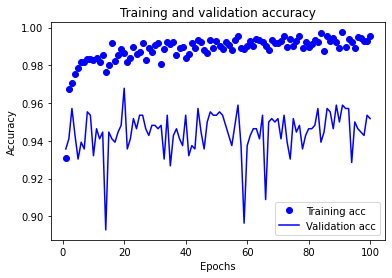

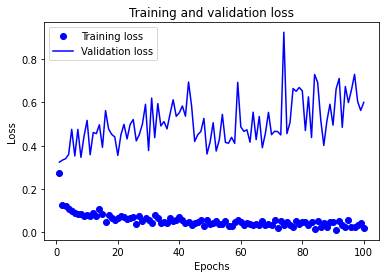

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
best_model_fine_tuned_with_adversarial_images = load_model('VGG16_Indus_Fruits_7_classes_100_100_10th Experiment_fine_tuned with Adversarial Images_0_15.h5')

In [37]:
best_model_fine_tuned_with_adversarial_images.evaluate(x=test_data, y=to_categorical(test_labels,7), verbose=1)

18/18 [==============================] - 1s 65ms/step - loss: 0.2401 - categorical_accuracy: 0.9429


[0.24011731147766113, 0.9428571462631226]

In [38]:
best_model_fine_tuned_with_adversarial_images.evaluate(x=adversarial_test_data, y=to_categorical(adversarial_test_labels,7), verbose=1)

18/18 [==============================] - 1s 65ms/step - loss: 0.7320 - categorical_accuracy: 0.9214


[0.7320261001586914, 0.9214285612106323]